# 서울의 방범용 CCTV 위치와 인구 데이터분석
- https://data.seoul.go.kr/dataList/OA-20923/S/1/datasetView.do
- 목표 : CCTV 수와 인구대비 CCTV 비율을 파악
- 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인
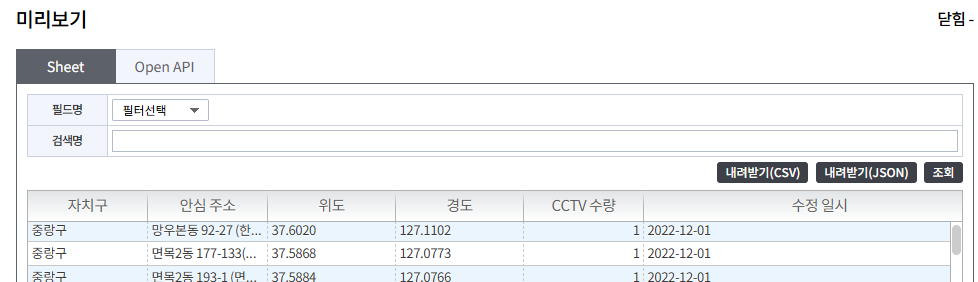

In [24]:
# OS에 사용가능한 , 설치된 폰트를 나열
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths=None, fontext='ttf')
#fontlist : 있는 폰트 다 보여줌 ~

Text(0.2, 0.4, '한글')

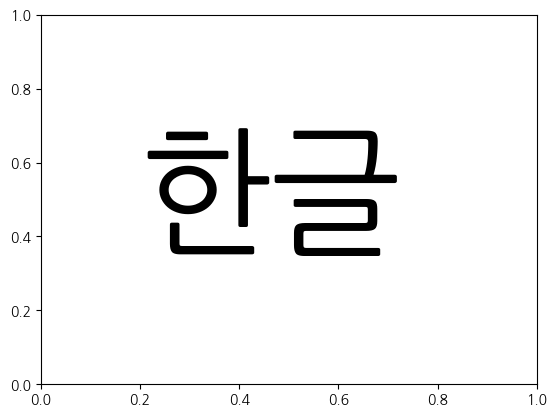

In [25]:
# 윈도우용 폰트 경로 설정
# path = "C:\\Windows\\Fonts\\NanumGothic.ttf"
# font_name = fm.FontProperties(fname=path).get_name()
# rc('font',family=font_name)

# 리눅스용 폰트 경로 설정
plt.rc('font',family ="NanumGothic")
plt.text(0.2,0.4,'한글',size=100)

In [3]:
#!pwd   : 리눅스 기반에서 써서 그런가 봄 !!!

/home/jovyan/data/data ref


In [4]:
#!pip install chardet

# import pandas as pd
# import chardet

# with open(file_path2, 'rb') as file:
#     raw_data = file.read()

# result = chardet.detect(raw_data)
# encoding = result['encoding']
# print(encoding)
# S_CCTV = pd.read_csv(file_path2, encoding=encoding)
# S_CCTV.sample(3)

In [9]:
import pandas as pd
file_path1 = "./data ref/서울시안심이CCTV연계현황.csv"
S_CCTV = pd.read_csv(file_path1,encoding="CP949")
S_CCTV.sample(3)

,자치구,안심 주소,위도,경도,CCTV 수량,Unnamed: 5
77659,강남구,압구정-107-02,37.5234,127.0390,1,NaN
82222,강남구,청담-294-00,37.5212,127.0470,1,NaN
59387,광진구,생활방범-능동-116-02,37.5563,127.0798,1,NaN


In [10]:
s_cctv=S_CCTV.rename(columns={"자치구":"local"})['local']
s_cctv

0        중랑구
1        중랑구
2        중랑구
3        중랑구
4        중랑구
        ... 
83729    강남구
83730    강남구
83731    강남구
83732    강남구
83733    강남구
Name: local, Length: 83734, dtype: object

In [11]:
s_cctv = s_cctv.value_counts()
s_cctv= s_cctv.reset_index()
s_cctv.sample(3)

,local,count
10,서대문구,3223
7,성북구,3943
2,서초구,5060


_________________

- 행정동별 연령별 인구현황
- https://jumin.mois.go.kr/ageStatMonth.do
__________________
 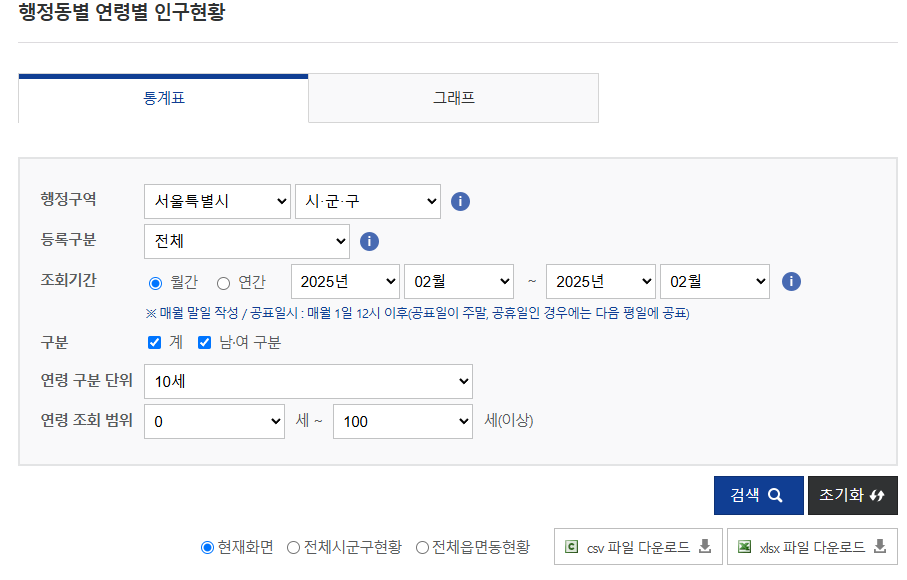

In [14]:
#!pip install openpyxl : 윈도우 주피터랩 기반

In [15]:
import pandas as pd
import warnings
warnings.simplefilter("ignore", UserWarning)  # 헉 !!! 경고를 무시하다니 !!

file_path2 = "./data ref/서울연령별인구현황.xlsx"
orig = pd.read_excel(file_path2,sheet_name="연령별인구현황",skiprows=3) # 3개를 날린 후 보여줘요 !
orig.head(2)

,행정기관코드,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
0,1100000000,서울특별시,"9,334,828","9,334,828","479,647","722,812","1,300,726","1,440,578","1,383,287","1,487,298",...,"353,609","689,021","719,456","699,527","755,937","697,579","430,416","212,316","36,770","1,148"
1,1111000000,서울특별시 종로구,"138,277","138,277","5,429","9,446","20,820","19,672","18,514","23,324",...,"4,818","11,068","9,824","9,576","11,821","10,527","6,515","4,117",779,29


In [16]:
data = orig[['행정기관','총 인구수']]
data.columns = ["local", "population"]
data = data.loc[1:]
data['local'] = data['local'].apply(lambda x:x.replace("서울특별시 ",""))
data = data.reset_index(drop=True) # drop = True는 기존 인덱스를 삭제하고 인덱스를 새롭게 부여 
data.sample(3)

,local,population
1,중구,"120,119"
15,강서구,"554,535"
16,구로구,"386,862"


In [17]:
data['local'] = data['local'].apply(lambda x: x.strip())
s_cctv['local'] = s_cctv['local'].apply(lambda x: x.strip())

In [18]:
import pandas as pd
file_path3 = "./data ref/5대범죄발생현황_2023.csv"
s_crime = pd.read_csv(file_path3,encoding="utf-8")
s_crime = s_crime.loc[2:]
s_crime = s_crime.drop(s_crime.columns[0],axis=1)
s_crime.columns = ["local", "c_count"]
s_crime.head(2)

,local,c_count
2,종로구,2981
3,중구,3348


In [30]:
total = pd.merge(s_cctv, data, on='local')
total = pd.merge(total, s_crime, on='local')
total # pd.merge는 한번에 2개씩 합칠 수 있다 !!

,local,count,population,c_count
0,강남구,7007,"557,501",6763
1,관악구,5366,"478,699",4769
2,서초구,5060,"408,248",4522
3,은평구,4111,"460,354",3493
4,광진구,4091,"331,413",3424
5,구로구,4050,"386,862",3737
6,성동구,4036,"273,577",2023
7,성북구,3943,"420,571",2411
8,양천구,3845,"430,047",3019
9,중랑구,3471,"378,365",3324


In [31]:
total['population'] = total['population'].str.replace(",","").astype(int)
total = total.sort_values(by="population", ascending=False)
total = total.set_index('local') # 중요함!!!  > local을 아예 인덱스화 시켜버렸음 !!!
total.sample(3)

,count,population,c_count
local,,,
양천구,3845,430047,3019
영등포구,2899,373071,4418
송파구,3094,648432,5223


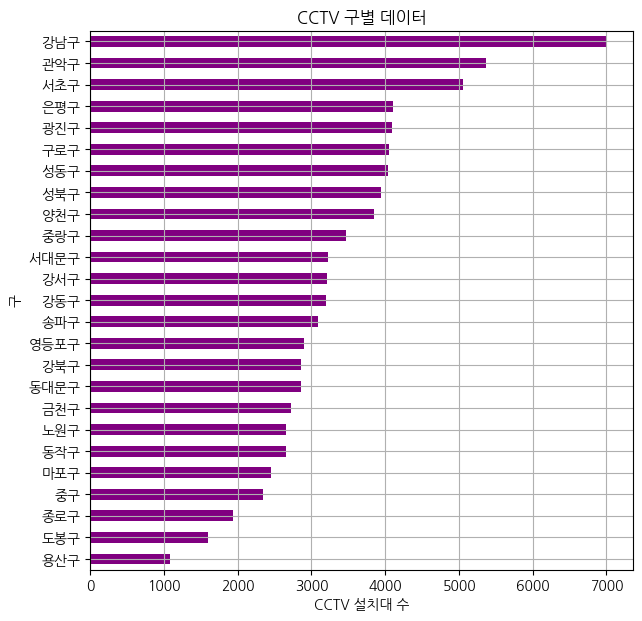

In [32]:
# plt.figure()
# plt.figure()
total['count'].sort_values().plot( kind="barh",grid=True,figsize=(7,7), ylabel="구",color="purple")

plt.title("CCTV 구별 데이터")
plt.xlabel("CCTV 설치대 수")
plt.show()

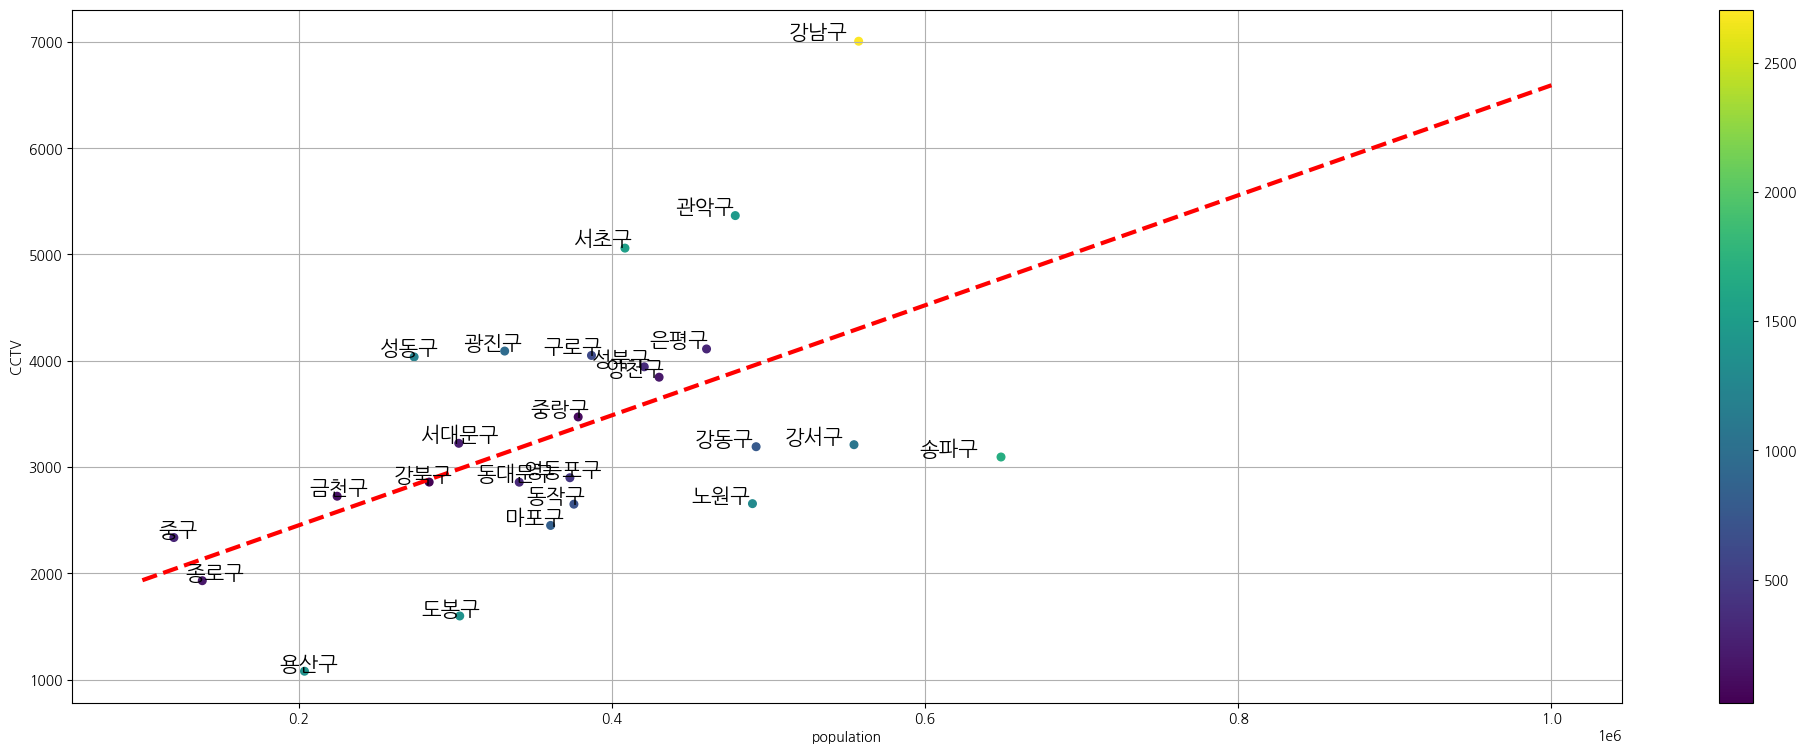

In [27]:
import numpy as np
fp1 = np.polyfit(total['population'],total['count'],1)  # 여기서 1은 기울기 !!

f1 = np.poly1d(fp1)  # 기울기와 함수를 만들어내는 과정

fx = np.linspace(100000,1000000,10)
plt.figure(figsize=(25,9))
plt.plot(fx,f1(fx), ls='dashed', lw=3, color='r')

# 오차
total['err'] = np.abs(total['count']-f1(total['population']))

plt.scatter(total['population'],total['count'], s= 30, c = total['err'])
plt.xlabel('population')
plt.ylabel('CCTV')
plt.plot()

# 각 점마다 동의 이름을 부여 !!
for i in range(len(total['population'])):
    plt.text(total['population'].iloc[i]*0.92,total['count'].iloc[i]*1.004,total.index[i],fontsize=15)
                                     #  ㄴ글자가 왼쪽으로 갈 수 있도록 /올라갈 수 있도록 숫자를 곱해줌!!

plt.grid()
plt.colorbar()
plt.show()

In [39]:
x = total['population']
y = total['count']
z = total['c_count']

In [36]:
import numpy as np
regions = list(x.index)  # 라벨
color = [np.random.rand(3,) for _ in range(len(regions))] # 색의 수를 regions의 길이만큼 다양하게 바꿔줘!!

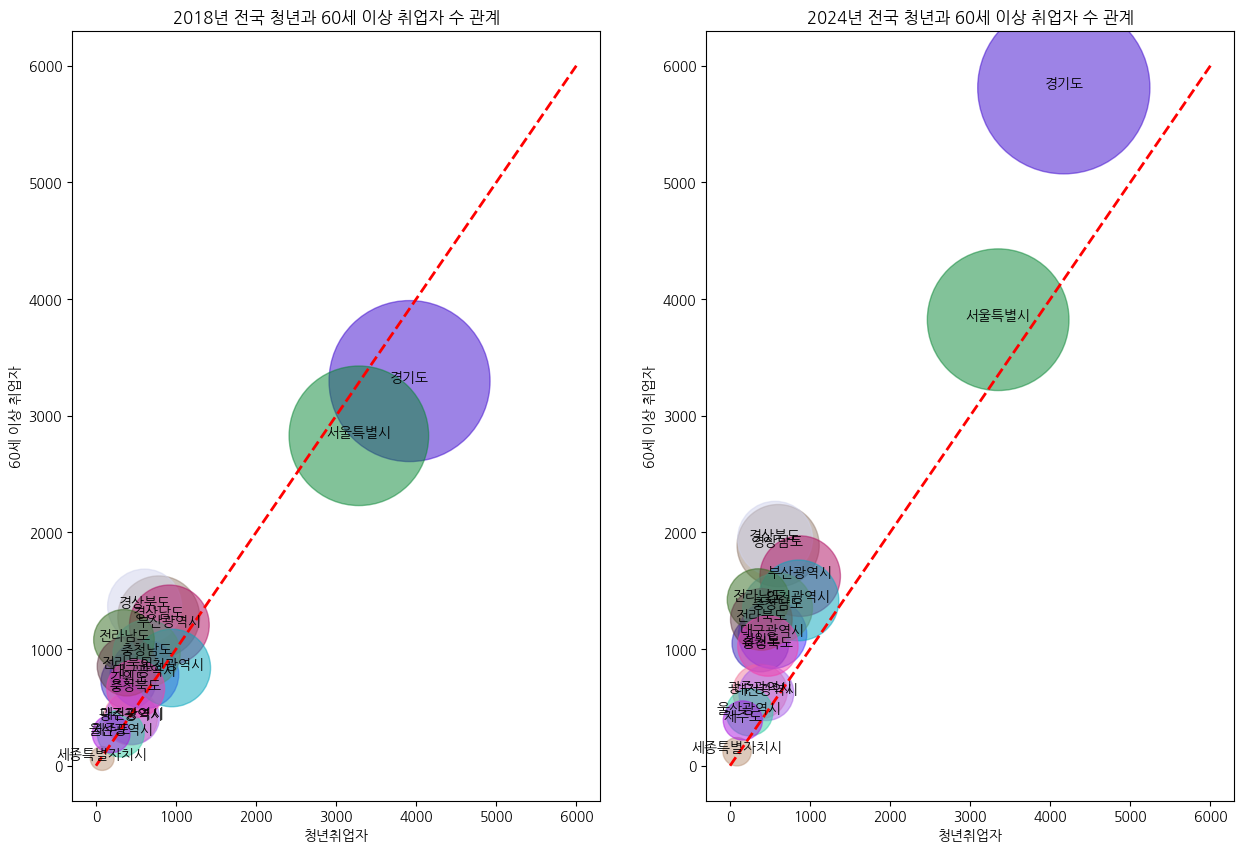

In [46]:
plt.figure = (figsize=(15,10))
z = np.array(z,dtype=float)

scatter = scatter(x,y,s=z*0.5,c=color, alpha=0.5)  # z 가 들어가면 점의 크기까지 조절할 수 있다 !!
plt.title("")


ax.set_title("2018년 전국 청년과 60세 이상 취업자 수 관계")
ax[0].set_xlabel("청년취업자")
ax[0].set_ylabel("60세 이상 취업자")

plt.plot([0,6000],[0,6000], color="r", linestyle="--",linewidth=2)

for n in range(len(regions)):
    ax.annotate(regions[n],xy=(x.iloc[n],y.iloc[n]),ha="center")  # 원에 라벨링 하는 작업 !!




plt.show()